In [1]:
# loading libraries
import pandas as pd
import numpy as np
from statistics import stdev
from statistics import mean

import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Reading data and dividing dependent and independent variables separately


In [2]:
# loading training data
df = pd.read_csv('HWdata.csv')
df.head()
X_df=df.drop('Lbl', axis=1)
X_df.head()

X = X_df
y = df['Lbl']

In [3]:
df.head()

,W,H,Lbl
0,3.4023,5.3059,NS
1,1.7465,3.4280,NS
2,2.7475,4.2488,NS
3,0.6408,7.1654,NS
4,3.6903,1.5333,NS


## Plotting data before normalization

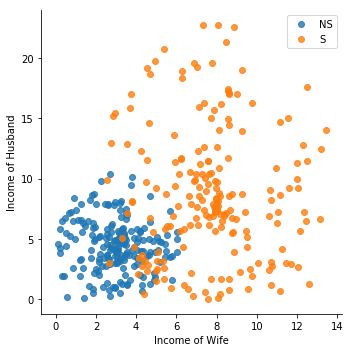

In [4]:
import seaborn as sns
sns.lmplot('W', 'H', df, hue='Lbl', fit_reg=False,legend=False)
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.legend()
plt.xlabel('Income of Wife')
plt.ylabel('Income of Husband')
plt.show()

## Normalizing / Scaling the data to lie within range of (0,1)

In [5]:
X_df=(X-X.min())/(X.max()-X.min())

from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)

## Custom functions for implementing radius based classifier and function to find confusion matrix and metrics

In [6]:
def classifier_algo_rad(X_train, y_train, X_test, R):
    pred_results=[]
    for i in range(len(X_test)):
        distances = []
        targets   = []
        for j in range(len(X_train)):
            dist=math.sqrt(sum([(a - b) ** 2 for a, b in zip(X_test.iloc[i],X_train.iloc[j])]))
            if dist<=R:
                distances.append([dist, j])
                targets.append(y_train[j])
        if len(targets)==0:
            tmp_resp=0
        else:
            tmp_resp=max(set(targets), key=targets.count)
        pred_results.append(tmp_resp)
    return pred_results

def create_conf_matrix(expected, predicted, n_classes):
    m = [[0] * n_classes for i in range(n_classes)]
    for pred, exp in zip(predicted, expected):
        m[int(exp)][pred] += 1
    return m


def hit_rate(con_mat):
    val=(con_mat[0][0] +con_mat[1][1])/ (con_mat[0][0] + con_mat[1][0] +con_mat[0][1]+con_mat[1][1])
    return val

def sensitivity(con_mat):
    if (con_mat[1][1] + con_mat[1][0])==0:
        return float('NaN')
    val=con_mat[1][1] / (con_mat[1][1] + con_mat[1][0] )
    return val
def specificity(con_mat):
    if (con_mat[0][0] + con_mat[0][1])==0:
        return float('NaN')
    val=con_mat[0][0] / (con_mat[0][1] + con_mat[0][0] )
    return val
def PPV(con_mat):
    if (con_mat[1][1] + con_mat[0][1])==0:
        return float('NaN')
    val=con_mat[1][1] / (con_mat[1][1] + con_mat[0][1] )
    return val
def NPV(con_mat):
    if (con_mat[0][0] + con_mat[1][0])==0:
        return float('NaN')
    val=con_mat[0][0] / (con_mat[1][0] + con_mat[0][0] )
    return val


## Finding all distances so that to select the range of R values

In [7]:
all_point_dist=[]
for i in range(len(X_df)):
    for j in range(len(X_df)):
        d1=X_df.iloc[i]
        d2=X_df.iloc[j]
        tmp_d=math.sqrt(sum([(a - b) ** 2 for a, b in zip(d1, d2)]))
        all_point_dist.append(tmp_d)

In [8]:
all_point_dist_sort=sorted(all_point_dist)
all_point_dist_sort_nozero=all_point_dist_sort[399:]
len(all_point_dist_sort_nozero)

158802

In [9]:
print(min(all_point_dist_sort_nozero))
print(max(all_point_dist_sort_nozero))

0.0006442765009866125
1.1820225428082927


## Assigning R for range of values obtained by getting 12 parts between max an min . And then cutting two values

In [10]:
r_val=np.linspace(min(all_point_dist_sort_nozero),max(all_point_dist_sort_nozero),12)
r_val = r_val[1:-1]
len(r_val)

10

## Calling implemented custom function to run on train data and finding mean and standard deviations of metrics for different R values

In [11]:
from sklearn.model_selection import train_test_split
mean_hr=[]
mean_sens=[]
mean_spec=[]
mean_ppv=[]
mean_npv=[]

sd_hr=[]
sd_sens=[]
sd_spec=[]
sd_ppv=[]
sd_npv=[]

for r in r_val:
    tmp_hr=[]
    tmp_sens=[]
    tmp_spec=[]
    tmp_ppv=[]
    tmp_npv=[]
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=i)
        pred_latest=classifier_algo_rad(X_train, y_train, X_test,r)
        con_mat=create_conf_matrix(y_test,pred_latest,2)
        tmp_hr.append(hit_rate(con_mat))
        tmp_sens.append(sensitivity(con_mat))
        tmp_spec.append(specificity(con_mat))
        tmp_ppv.append(PPV(con_mat))
        tmp_npv.append(NPV(con_mat))
     
    mean_hr.append(np.nanmean(tmp_hr))
    mean_sens.append(np.nanmean(tmp_sens))
    mean_spec.append(np.nanmean(tmp_spec))
    mean_ppv.append(np.nanmean(tmp_ppv))
    mean_npv.append(np.nanmean(tmp_npv))

    sd_hr.append(np.nanstd(tmp_hr))
    sd_sens.append(np.nanstd(tmp_sens))
    sd_spec.append(np.nanstd(tmp_spec))
    sd_ppv.append(np.nanstd(tmp_ppv))
    sd_npv.append(np.nanstd(tmp_npv))

In [12]:
print(mean_hr)
print(mean_sens)
print(mean_spec)
print(mean_ppv)
print(mean_npv)

print(sd_hr)
print(sd_sens)
print(sd_spec)
print(sd_ppv)
print(sd_npv)

[0.9037500000000002, 0.91375, 0.8925000000000001, 0.8787500000000001, 0.8324999999999999, 0.80625, 0.72125, 0.5900000000000001, 0.4987499999999999, 0.4600000000000001]
[0.8294329939055041, 0.8342158165124886, 0.7775060171223541, 0.7493918036832512, 0.6601259872308904, 0.6337627761254999, 0.6431460948493196, 0.6899758933450595, 0.7082159489881271, 0.7069767441860465]
[0.9740606531003333, 0.9874474474474475, 1.0, 1.0, 1.0, 0.986611616672284, 0.8292286799819661, 0.5557458892928325, 0.3735338702854548, 0.30238095238095236]
[0.9677032112579779, 0.9861858974358974, 1.0, 1.0, 1.0, 0.981573369159576, 0.8288125634055866, 0.6932705569957069, 0.6385114636798649, 0.5784458509142053]
[0.8600474294729177, 0.8656096988502402, 0.8295751545752834, 0.8120199831889838, 0.7577226955225215, 0.7484498280736945, 0.732713613704934, 0.7600691115127736, 0.8146020646020645, 0.5919283511846802]
[0.02503123049312598, 0.031349840509961126, 0.042646805273079964, 0.046787418180532246, 0.06279928343540234, 0.114188714

## Plotting the metrics with mean values and 1- standard deviation error bar on them

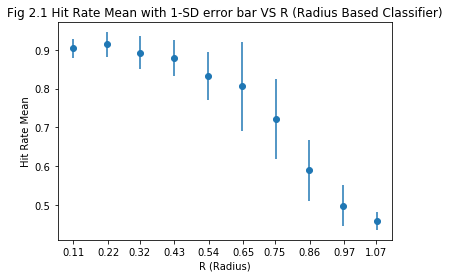

In [13]:
plt.errorbar(r_val,mean_hr, yerr=sd_hr,fmt='o')
plt.xlabel('R (Radius)')
plt.ylabel('Hit Rate Mean')
plt.xticks([round(i,2) for i in r_val])
plt.title('Fig 2.1 Hit Rate Mean with 1-SD error bar VS R (Radius Based Classifier)')
plt.show()

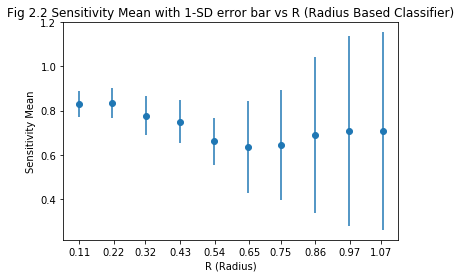

In [14]:
plt.errorbar(r_val,mean_sens, yerr=sd_sens,fmt='o')
plt.xlabel('R (Radius)')
plt.ylabel('Sensitivity Mean')
plt.xticks([round(i,2) for i in r_val])
plt.title('Fig 2.2 Sensitivity Mean with 1-SD error bar vs R (Radius Based Classifier)')
plt.show()

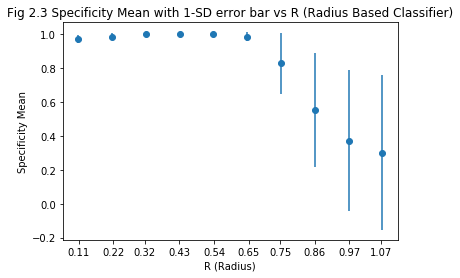

In [15]:
plt.errorbar(r_val,mean_spec, yerr=sd_spec,fmt='o')
plt.xlabel('R (Radius)')
plt.ylabel('Specificity Mean')
plt.xticks([round(i,2) for i in r_val])
plt.title('Fig 2.3 Specificity Mean with 1-SD error bar vs R (Radius Based Classifier)')
plt.show()

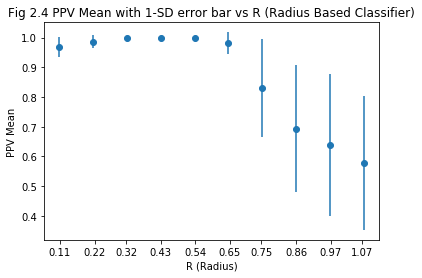

In [16]:
plt.errorbar(r_val,mean_ppv, yerr=sd_ppv,fmt='o')
plt.xlabel('R (Radius)')
plt.ylabel('PPV Mean')
plt.xticks([round(i,2) for i in r_val])
plt.title('Fig 2.4 PPV Mean with 1-SD error bar vs R (Radius Based Classifier)')
plt.show()

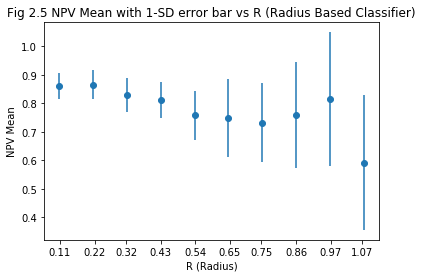

In [17]:
plt.errorbar(r_val,mean_npv, yerr=sd_npv,fmt='o')
plt.xlabel('R (Radius)')
plt.ylabel('NPV Mean')
plt.xticks([round(i,2) for i in r_val])
plt.title('Fig 2.5 NPV Mean with 1-SD error bar vs R (Radius Based Classifier)')
plt.show()

## Plotting decision boundary for Radius based classifier

0.2154403249204968


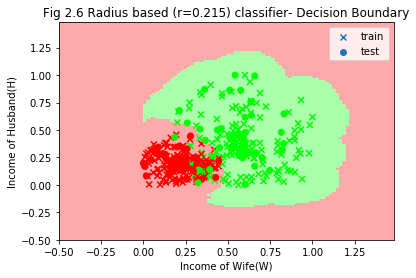

In [20]:
from matplotlib.colors import ListedColormap

r=r_val[1]
print(r)
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_df, y, test_size=0.2, random_state=5)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_df.iloc[:, 0].min()-0.5 , X_df.iloc[:, 0].max()+0.5
y_min, y_max = X_df.iloc[:, 1].min()-0.5 , X_df.iloc[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_test_df=pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
Z=classifier_algo_rad(X_train_R, y_train_R, mesh_test_df,r)

Z=np.asarray(Z)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train_R.iloc[:, 0], X_train_R.iloc[:, 1], c=y_train_R,cmap=cmap_bold,marker='x',label='train')
plt.scatter(X_test_R.iloc[:, 0], X_test_R.iloc[:, 1], c=y_test_R,cmap=cmap_bold,marker='o',label='test')
plt.legend()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Income of Wife(W)')
plt.ylabel('Income of Husband(H)')
plt.title('Fig 2.6 Radius based (r=0.215) classifier- Decision Boundary')

plt.show()

## Custom functions to implement the KNN

In [20]:
def calDistance(d1,d2,distType):
    d=0
    if distType=='Manhattan':
        d= sum([abs(a - b) for a, b in zip(d1, d2)])
    elif distType=='Euclidean':
        d= math.sqrt(sum([(a - b) ** 2 for a, b in zip(d1, d2)]))
    elif distType=='Chebyshev':
        d= max([abs(a - b) for a, b in zip(d1, d2)])
    else:
        d= math.sqrt(sum([(a - b) ** 2 for a, b in zip(d1, d2)]))
    return d
   
def kNN(X_train, y_train, X_test, k, distType, weight):
    pred_results=[]
    for i in range(len(X_test)):
        distances = []
        targets   = []
        for j in range(len(X_train)):
            dist=calDistance(X_test.iloc[i],X_train.iloc[j],distType)
            distances.append([dist, j])
        distances = sorted(distances)
        
        tmp_l=[]
        for h in range(k):
            tmp_indx = distances[h][1]
            if distances[h][0]!=0:
                tmp_l.append([1/((distances[h][0])**2),tmp_indx])
            else:
                tmp_resp=y_train[tmp_indx]
            targets.append(y_train[tmp_indx])
        
        
        if weight=='weightedKNN':
            if len(tmp_l)!=0:
                tmp_l_sort=sorted(tmp_l)
                tmp_resp=y_train[tmp_l_sort[0][1]]     
        else:
            if len(targets)==0:
                tmp_resp=0
            else:
                tmp_resp=max(set(targets), key=targets.count)
                
        pred_results.append(tmp_resp)

    return pred_results

## Calculating the metrics for KNN classifier

In [21]:
mean_hr_knn=[]
mean_sens_knn=[]
mean_spec_knn=[]
mean_ppv_knn=[]
mean_npv_knn=[]

sd_hr_knn=[]
sd_sens_knn=[]
sd_spec_knn=[]
sd_ppv_knn=[]
sd_npv_knn=[]

for k in range(1,20):
    tmp_hr_knn=[]
    tmp_sens_knn=[]
    tmp_spec_knn=[]
    tmp_ppv_knn=[]
    tmp_npv_knn=[]
    for i in range(10):
        X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_df, y, test_size=0.2, random_state=i)
        pred_latest=kNN(X_train_knn, y_train_knn, X_test_knn, k, 'Euclidean','normalKNN')
        con_mat=create_conf_matrix(y_test_knn,pred_latest,2)
        tmp_hr_knn.append(hit_rate(con_mat))
        tmp_sens_knn.append(sensitivity(con_mat))
        tmp_spec_knn.append(specificity(con_mat))
        tmp_ppv_knn.append(PPV(con_mat))
        tmp_npv_knn.append(NPV(con_mat))
    
    mean_hr_knn.append(np.nanmean(tmp_hr_knn))
    mean_sens_knn.append(np.nanmean(tmp_sens_knn))
    mean_spec_knn.append(np.nanmean(tmp_spec_knn))
    mean_ppv_knn.append(np.nanmean(tmp_ppv_knn))
    mean_npv_knn.append(np.nanmean(tmp_npv_knn))

    sd_hr_knn.append(np.nanstd(tmp_hr_knn))
    sd_sens_knn.append(np.nanstd(tmp_sens_knn))
    sd_spec_knn.append(np.nanstd(tmp_spec_knn))
    sd_ppv_knn.append(np.nanstd(tmp_ppv_knn))
    sd_npv_knn.append(np.nanstd(tmp_npv_knn))


In [22]:
print(mean_hr_knn)
print(mean_sens_knn)
print(mean_spec_knn)
print(mean_ppv_knn)
print(mean_npv_knn)

print(sd_hr_knn)
print(sd_sens_knn)
print(sd_spec_knn)
print(sd_ppv_knn)
print(sd_npv_knn)

[0.8800000000000001, 0.8987499999999999, 0.9012499999999999, 0.89625, 0.9075, 0.9049999999999999, 0.9099999999999999, 0.9075, 0.9075, 0.9075, 0.9037499999999999, 0.9099999999999999, 0.9049999999999999, 0.9087500000000001, 0.9012499999999999, 0.9037499999999999, 0.9024999999999999, 0.9024999999999999, 0.9037499999999999]
[0.8695462869189183, 0.8272352319609924, 0.8711557569775209, 0.8339824609175237, 0.8768829525499175, 0.8500624627122919, 0.8788314126379125, 0.8559337753456182, 0.8717807728939622, 0.8507510510931265, 0.8636604721420825, 0.8536054221476999, 0.8557793351911782, 0.8482711404976288, 0.8482711404976288, 0.8402265574530456, 0.8456359141781918, 0.8405325550050653, 0.8460130354855459]
[0.8926631235637622, 0.9660607701004504, 0.9306773452984209, 0.9545865595564724, 0.9377094604700711, 0.9571884199490306, 0.9409917788737241, 0.9568618036921818, 0.9428244468947076, 0.9619889020194824, 0.9431929174145998, 0.9655470106382582, 0.9533064455769085, 0.9673438023743828, 0.95272934673894

In [23]:
k_val=range(1,20)

## Plotting the metrics with mean values and 1- standard deviation error bar on them for KNN

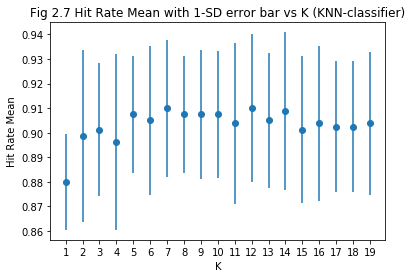

In [24]:
plt.errorbar(k_val,mean_hr_knn, yerr=sd_hr_knn,fmt='o')
plt.xlabel('K')
plt.ylabel('Hit Rate Mean')
plt.xticks([round(i,2) for i in k_val])
plt.title('Fig 2.7 Hit Rate Mean with 1-SD error bar vs K (KNN-classifier)')
plt.show()

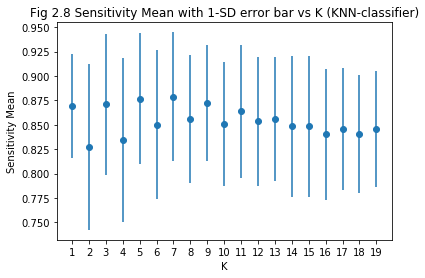

In [25]:
plt.errorbar(k_val,mean_sens_knn, yerr=sd_sens_knn,fmt='o')
plt.xlabel('K')
plt.ylabel('Sensitivity Mean')
plt.xticks([round(i,2) for i in k_val])
plt.title('Fig 2.8 Sensitivity Mean with 1-SD error bar vs K (KNN-classifier)')
plt.show()

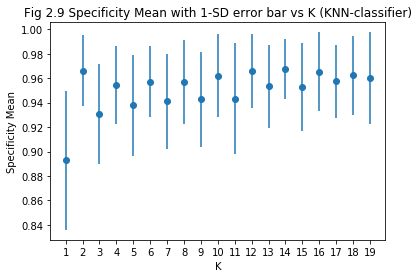

In [26]:
plt.errorbar(k_val,mean_spec_knn, yerr=sd_spec_knn,fmt='o')
plt.xlabel('K')
plt.ylabel('Specificity Mean')
plt.xticks([round(i,2) for i in k_val])
plt.title('Fig 2.9 Specificity Mean with 1-SD error bar vs K (KNN-classifier)')
plt.show()

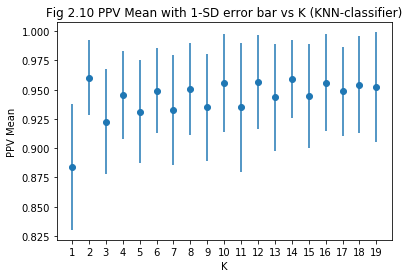

In [27]:
plt.errorbar(k_val,mean_ppv_knn, yerr=sd_ppv_knn,fmt='o')
plt.xlabel('K')
plt.ylabel('PPV Mean')
plt.xticks([round(i,2) for i in k_val])
plt.title('Fig 2.10 PPV Mean with 1-SD error bar vs K (KNN-classifier)')
plt.show()

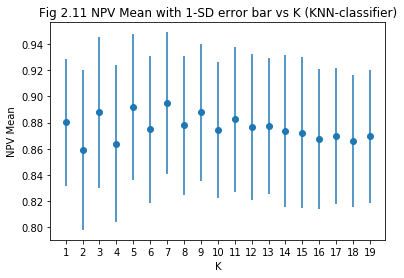

In [28]:
plt.errorbar(k_val,mean_npv_knn, yerr=sd_npv_knn,fmt='o')
plt.xlabel('K')
plt.ylabel('NPV Mean')
plt.xticks([round(i,2) for i in k_val])
plt.title('Fig 2.11 NPV Mean with 1-SD error bar vs K (KNN-classifier)')
plt.show()

## Plotting decision boundary for KNN classifier with 7 nearest neighbours

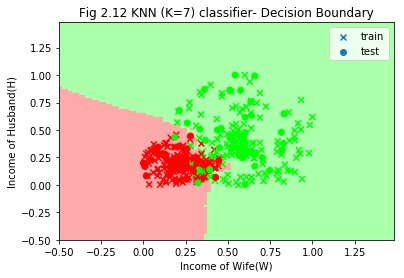

In [29]:
from matplotlib.colors import ListedColormap


k_final=7
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_df, y, test_size=0.2, random_state=5)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_df.iloc[:, 0].min()-0.5 , X_df.iloc[:, 0].max()+0.5
y_min, y_max = X_df.iloc[:, 1].min()-0.5 , X_df.iloc[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_test_df=pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
Z=kNN(X_train_knn, y_train_knn, mesh_test_df, k_final, 'Euclidean','normalKNN')


Z=np.asarray(Z)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train_knn.iloc[:, 0], X_train_knn.iloc[:, 1], c=y_train_knn,cmap=cmap_bold,marker='x',label='train')
plt.scatter(X_test_knn.iloc[:, 0], X_test_knn.iloc[:, 1], c=y_test_knn,cmap=cmap_bold,marker='o',label='test')
plt.legend()
plt.xlabel('Income of Wife(W)')
plt.ylabel('Income of Husband(H)')
plt.title('Fig 2.12 KNN (K=7) classifier- Decision Boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()